In [2]:
import sys
print sys.modules.keys()


['_multiprocessing', 'IPython.core.error', 'ipython_genutils.py3compat', 'traitlets.config.sys', 'concurrent.futures.types', 'ipykernel.parentpoller', 'traitlets.config.decorator', 'ctypes.os', 'IPython.terminal.pt_inputhooks.importlib', 'runpy', 'gc', 'ipykernel.os', 'prompt_toolkit.terminal.vt100_output', 'prompt_toolkit.key_binding.six', 'dateutil.parser.dateutil', 'pygments.filters', 'IPython.utils.pprint', 'jupyter_client.blocking.channels', 'ipykernel.kernelbase', 'IPython.core.msvcrt', 'logging.weakref', 're', 'traitlets.traitlets', 'dateutil.tz.os', 'pprint', 'ipykernel.getpass', 'prompt_toolkit.key_binding.manager', 'IPython.utils.simplegeneric', 'prompt_toolkit.key_binding.bindings.vi', 'ipykernel.traitlets', 'IPython.core.magics.display', 'colorama.ansi', 'timeit', 'IPython.terminal.sys', 'string', 'prompt_toolkit.__future__', 'prompt_toolkit.layout.six', 'multiprocessing.threading', 'jupyter_client.blocking.__future__', 'IPython.utils.timing', 'encodings.utf_8', 'concurrent

In [4]:
import sys
del sys.modules['config']
del sys.modules['entropy']
del sys.modules['featureExtraction']
del sys.modules['pos']

In [1]:
# imports
import sys
import os
import logging

import config
from entropy import videoEntropyMatrix

import featureExtraction as fe

import pandas as pd
import numpy as np

C:\_TOOLS\anaconda3\envs\sppas\lib\site-packages\pydub\utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [2]:
#import subprocess
#cmd = ['python', 'featureExtraction.py', '--splits', '0.15', '0.70', '0.15']
#print("Executing: ", str(subprocess.list2cmdline(cmd)))
#print(subprocess.check_output(cmd))


fe.main("--splits '[0.15, 0.70, 0.15]''")


Logging to C:\IAAA\TER\predpres-2019-0221_00-07-44.log


Traceback (most recent call last):
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 868, in emit
    msg = self.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 741, in format
    return fmt.format(record)
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 465, in format
    record.message = record.getMessage()
  File "C:\_TOOLS\anaconda3\envs\sppas\lib\logging\__init__.py", line 329, in getMessage
    msg = msg % self.args
TypeError: not all arguments converted during string formatting
Logged from file pos.py, line 95


CalledProcessError: Command '['C:\\IAAA\\TER\\resources\\tools\\MarsaTag\\MarsaTag-UI.bat', '-cli', '-pt', 'TokensAlign', '-oral', '-P', '-p', 'lpl-oral', '-r', 'elan-lite', '-w', 'elan-lite', '-in-ext', '.eaf', '--out-ext', '-marsatag.eaf', 'C:\\IAAA\\TER\\data\\ACORFORMED\\Data\\E04D\\Casque\\Superviseur\\session-170421-1321\\000000-00_micro-palign.eaf']' returned non-zero exit status 1

In [3]:
pathsList = fe.filePaths()
print(pathsList)

[['C:\\IAAA\\TER\\data\\ACORFORMED\\Data\\E04D\\Casque\\Superviseur\\session-170421-1321\\000000-00_micro.wav', 'C:\\IAAA\\TER\\data\\ACORFORMED\\Data\\E04D\\Casque\\Unity\\E4D-Casque-Unity-out_record_DATE17-4-21_13-35-20.txt', 'C:\\IAAA\\TER\\data\\ACORFORMED\\Data\\E04D\\Casque\\Video\\E4D-Casque-Video-00023-1.mp4'], ['C:\\IAAA\\TER\\data\\CorpusHMPassation\\E04D\\Cave\\data\\E04D-03-Cave-micro.wav', 'C:\\IAAA\\TER\\data\\CorpusHMPassation\\E04D\\Cave\\data\\asr-trans\\E04D-03-Cave-micro.E4D-latin1.xra', 'C:\\IAAA\\TER\\data\\ACORFORMED\\Data\\E04D\\Cave\\Unity\\E4D-Cave-Unity-out_record_DATE17-4-21_13-48-2.txt', 'C:\\IAAA\\TER\\data\\ACORFORMED\\Data\\E04D\\Cave\\Video\\E4D-Cave-Video-00025-1.mp4'], ['C:\\IAAA\\TER\\data\\CorpusHMPassation\\E04D\\PC\\data\\E04D-02-PC-micro.wav', 'C:\\IAAA\\TER\\data\\CorpusHMPassation\\E04D\\PC\\data\\asr-trans\\E04D-02-PC-micro.E4D-latin1.xra', 'C:\\IAAA\\TER\\data\\ACORFORMED\\Data\\E04D\\PC\\Unity\\E4D-PC-Unity-out_record_DATE17-4-21_13-49-39.txt

In [48]:
# run random forests on already computed matrix
fe.logger = logging.getLogger('featureExtraction')
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logging.basicConfig(filename=config.LOGFILE, level=logging.DEBUG, format='%(levelname)s : %(asctime)s : %(name)s : %(message)s')

grid = fe.randomForest_gridsearch(os.path.join(config.CORPUS_PATH, 'matrix.xlsx'), 
                                  "presence",
                                  upsample=False)

('X_train ', (68L, 20L), 'X_test', (18L, 20L), 'y_train', (68L,), 'y_test', (18L,))
presence random forest
Fitting 20 folds for each of 297 candidates, totalling 5940 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


('TEST Score : ', 0.3246753246753247)


[Parallel(n_jobs=1)]: Done 5940 out of 5940 | elapsed:  9.7min finished
C:\_TOOLS\anaconda3\envs\sppas\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [45]:
print(grid.best_params_)
print(grid.best_score_)
results = pd.DataFrame(data=grid.cv_results_)
results

{'n_estimators': 28, 'class_weight': 'balanced_subsample'}
0.7885304659498208


,mean_fit_time,mean_score_time,mean_test_f1_macro,mean_test_precision_macro,mean_test_recall_macro,mean_train_f1_macro,mean_train_precision_macro,mean_train_recall_macro,param_class_weight,param_n_estimators,...,split9_train_precision_macro,split9_train_recall_macro,std_fit_time,std_score_time,std_test_f1_macro,std_test_precision_macro,std_test_recall_macro,std_train_f1_macro,std_train_precision_macro,std_train_recall_macro
0,0.00155,0.00155,0.565830,0.563321,0.616487,0.859878,0.866798,0.860206,None,1,...,0.905983,0.904762,0.004653,0.004653,0.203097,0.223093,0.202707,0.034406,0.032474,0.034189
1,0.00220,0.00115,0.504625,0.463560,0.591398,0.834295,0.872104,0.837975,None,2,...,0.879773,0.846726,0.005591,0.003623,0.196552,0.220858,0.163073,0.041569,0.027548,0.037947
2,0.00470,0.00230,0.608363,0.598566,0.673835,0.929579,0.935653,0.927738,None,3,...,0.968487,0.964286,0.007184,0.005478,0.188341,0.226677,0.158235,0.031037,0.027048,0.031892
3,0.00625,0.00235,0.627479,0.627838,0.670251,0.941753,0.947252,0.940553,None,4,...,0.947059,0.940476,0.007661,0.005597,0.219551,0.258120,0.187702,0.025856,0.022378,0.026341
4,0.00780,0.00315,0.594743,0.591995,0.650538,0.960470,0.963491,0.959923,None,5,...,0.965743,0.965774,0.007711,0.006303,0.181981,0.212214,0.171201,0.014820,0.013138,0.014755
5,0.01245,0.00235,0.588172,0.573477,0.655914,0.966677,0.970184,0.965763,None,6,...,0.977994,0.976190,0.006241,0.005597,0.210609,0.253367,0.177609,0.019308,0.016844,0.019549
6,0.01250,0.00395,0.625090,0.604540,0.673835,0.979363,0.981352,0.978970,None,7,...,1.000000,1.000000,0.007953,0.006845,0.223817,0.239868,0.204364,0.017632,0.015420,0.017876
7,0.01195,0.00115,0.626045,0.636798,0.668459,0.988110,0.989062,0.987970,None,8,...,0.988506,0.988095,0.006119,0.003395,0.243424,0.271501,0.227309,0.012484,0.011154,0.012664
8,0.01520,0.00330,0.651971,0.645759,0.704301,0.990117,0.990831,0.989864,None,9,...,0.989899,0.988095,0.005124,0.006165,0.169625,0.207377,0.144862,0.013432,0.012440,0.013755
9,0.01325,0.00470,0.637037,0.634409,0.677419,0.988282,0.989195,0.987919,None,10,...,1.000000,1.000000,0.005585,0.007184,0.196081,0.225678,0.177609,0.012405,0.011423,0.012720


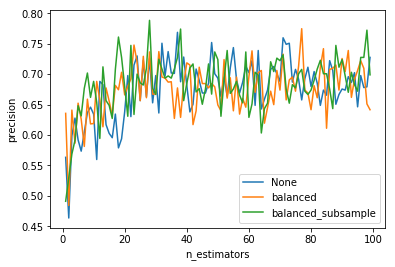

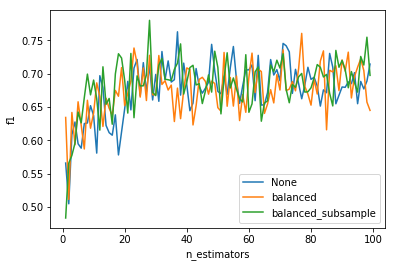

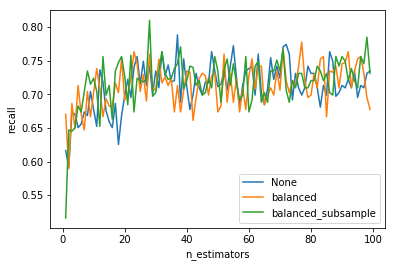

In [51]:
import matplotlib.pyplot as plt

sorted = results.sort_values(['param_n_estimators'])

none_class = sorted[~sorted['param_class_weight'].isin(['balanced', 'balanced_subsample'])]
balanced_class = sorted[sorted['param_class_weight'] == 'balanced']
balancedsub_class = sorted[sorted['param_class_weight'] == 'balanced_subsample']

plt.plot(none_class.param_n_estimators, none_class.mean_test_precision_macro, label="None")
plt.plot(balanced_class.param_n_estimators, balanced_class.mean_test_precision_macro, label="balanced")
plt.plot(balancedsub_class.param_n_estimators, balancedsub_class.mean_test_precision_macro, label="balanced_subsample")
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('precision')
plt.show()

plt.plot(none_class.param_n_estimators, none_class.mean_test_f1_macro, label="None")
plt.plot(balanced_class.param_n_estimators, balanced_class.mean_test_f1_macro, label="balanced")
plt.plot(balancedsub_class.param_n_estimators, balancedsub_class.mean_test_f1_macro, label="balanced_subsample")
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('f1')
plt.show()

plt.plot(none_class.param_n_estimators, none_class.mean_test_recall_macro, label="None")
plt.plot(balanced_class.param_n_estimators, balanced_class.mean_test_recall_macro, label="balanced")
plt.plot(balancedsub_class.param_n_estimators, balancedsub_class.mean_test_recall_macro, label="balanced_subsample")
plt.legend()
plt.xlabel('n_estimators')
plt.ylabel('recall')
plt.show()

In [5]:
in_matrix = os.path.join(config.CORPUS_PATH, 'matrix.xlsx')
out_matrix = os.path.join(config.CORPUS_PATH, 'matrix-averaged.xlsx')
fe.computeAveragedMatrix(in_matrix, out_matrix)

computeAveragedMatrix(dataFile=C:\IAAA\TER\data\ACORFORMED\Data\matrix.xlsx, outputFile=C:\IAAA\TER\data\ACORFORMED\Data\matrix-averaged.xlsx)


KeyError: "['Avg_HandEntropy_Begin' 'Avg_HandEntropy_Mid' 'Avg_HandEntropy_End'\n 'Avg_SentenceLength_Begin' 'Avg_IPUlen_Begin' 'Avg_IPUlen_Middle'\n 'Ratio1_Begin' 'Ratio1_Mid' 'Ratio1_End' 'Ratio2_Begin' 'Ratio2_Mid'\n 'Ratio2_End'] not in index"

In [5]:
# Sample compute entropy - no phase
recordFile = os.path.join(config.CORPUS_PATH, 'E2C', 'Casque', 'Unity', 'E2B-Casque-Unity-out_record_DATE17-4-21_11-36-34.txt')
print(recordFile)
videoEntropyMatrix(recordFile, [1.00, 0, 0])

C:\IAAA\TER\data\ACORFORMED\Data\E2C\Casque\Unity\E2B-Casque-Unity-out_record_DATE17-4-21_11-36-34.txt
[0.05118677 0.0554765  0.08040169 2.32266021 1.8760701  1.76955979
 2.22080822 2.04534562 2.13997821 0.79974848 1.80746816 0.79989779
 2.47765292 2.26767884 2.27720406]
(15L,)


array([0.05118677, 0.0554765 , 0.08040169, 2.32266021, 1.8760701 ,
       1.76955979, 2.22080822, 2.04534562, 2.13997821, 0.79974848,
       1.80746816, 0.79989779, 2.47765292, 2.26767884, 2.27720406])

In [47]:
import pandas as pd

del samples
del in_matrix
in_matrix = os.path.join('C:\\', 'IAAA', 'TER', 'data', 'Project - PresenceAutomaticPrediction', 
                         'Pre-processed data', 'matrix.xlsx')
samples = pd.read_excel(in_matrix)
#names = ("Expert", "Head_Entropy_Start", "Head_Entropy_Mid", "Head_Entropy_End", "Avg_HandEntropy_Begin", "Avg_HandEntropy_Mid", "Avg_HandEntropy_End", "Avg_SentenceLength_Begin", "Avg_SentenceLength_Mid", "Avg_SentenceLength_End", "Avg_IPUlen_Begin", "Avg_IPUlen_Middle", "Avg_IPUlen_End", "Ratio1_Begin", "Ratio1_Mid", "Ratio1_End", "Ratio2_Begin", "Ratio2_Mid", "Ratio2_End", "Duration")
#samples = samples[list(names)]

In [48]:
samples.drop(['Candidate', 'Environment'], axis=1)

,Expert,Head_Entropy_Start,Head_Entropy_Mid,Head_Entropy_End,LeftWrist_Entropy_Start,LeftWrist_Entropy_Mid,LeftWrist_Entropy_End,RightWrist_Entropy_Start,RightWrist_Entropy_Mid,RightWrist_Entropy_End,...,Ratio1_Mid,Ratio1_End,Ratio2_Begin,Ratio2_Mid,Ratio2_End,Duration,Presence Score,Presence Class,Co-presence Score,Co-presence Class
0,0,1.620065,2.772323,2.041698,1.392627,2.688408,1.222870,1.626681,3.165677,1.373161,...,0.136882,0.111111,0.163636,0.201521,0.222222,176.69000,2.153846,1,2.5,2
1,0,1.607020,3.375025,1.685876,1.430639,3.252918,1.806254,1.664035,3.192419,1.566622,...,0.169576,0.232143,0.202703,0.199501,0.160714,223.46875,3.714286,3,2.6,2
2,0,1.894657,3.235629,1.760955,1.582671,3.376458,2.134019,1.700208,3.319778,2.055413,...,0.135211,0.177215,0.222222,0.239437,0.240506,228.43750,3.500000,3,2.5,2
3,0,1.208405,2.840889,1.755899,1.623034,2.225854,1.470777,1.702093,2.487293,1.651560,...,0.176692,0.148148,0.219512,0.176692,0.259259,136.46875,1.000000,1,3.8,3
4,0,1.810643,2.842002,0.700632,1.121666,2.184798,0.663117,1.081686,0.597489,0.356056,...,0.190722,0.357143,0.181818,0.185567,0.142857,116.56250,4.384615,3,4.1,3
5,0,1.602321,2.833371,1.835899,1.225035,2.275394,1.752965,1.228537,2.567528,1.281582,...,0.176471,0.238095,0.127660,0.182353,0.238095,171.00000,2.071429,1,3.2,2
6,0,2.158885,3.161219,1.675367,1.504347,2.475369,1.792509,1.778807,1.586119,1.472081,...,0.157635,0.260870,0.204545,0.182266,0.173913,181.60000,2.571429,2,3.3,2
7,0,1.326662,2.690200,1.128224,1.691715,2.424334,1.508885,0.499812,2.010809,1.153278,...,0.084112,0.266667,0.166667,0.205607,0.200000,109.03125,4.153846,3,3.1,2
8,0,1.205576,2.745344,1.128501,0.237131,2.355243,0.836073,1.020001,2.298857,0.892259,...,0.141176,0.000000,0.117647,0.141176,0.500000,98.12500,3.000000,2,2.8,2
9,0,1.662336,2.856660,0.928306,1.294070,1.053877,1.245376,1.363724,2.627678,0.618966,...,0.151163,0.000000,0.142857,0.162791,0.500000,95.88000,3.928571,3,3.1,2


In [49]:
samples['Head_Entropy_Avg'] = samples[['Head_Entropy_Start', 'Head_Entropy_Mid', 'Head_Entropy_End']].mean(axis=1)
samples['Avg_HandEntropy_Avg'] = samples[['Avg_HandEntropy_Begin', 'Avg_HandEntropy_Mid', 'Avg_HandEntropy_End']].mean(axis=1)

samples

,Candidate,Environment,Expert,Head_Entropy_Start,Head_Entropy_Mid,Head_Entropy_End,LeftWrist_Entropy_Start,LeftWrist_Entropy_Mid,LeftWrist_Entropy_End,RightWrist_Entropy_Start,...,Ratio2_Begin,Ratio2_Mid,Ratio2_End,Duration,Presence Score,Presence Class,Co-presence Score,Co-presence Class,Head_Entropy_Avg,Avg_HandEntropy_Avg
0,N12F,PC,0,1.620065,2.772323,2.041698,1.392627,2.688408,1.222870,1.626681,...,0.163636,0.201521,0.222222,176.69000,2.153846,1,2.5,2,2.144696,1.930877
1,N12F,Cave,0,1.607020,3.375025,1.685876,1.430639,3.252918,1.806254,1.664035,...,0.202703,0.199501,0.160714,223.46875,3.714286,3,2.6,2,2.222640,2.159807
2,N12F,Casque,0,1.894657,3.235629,1.760955,1.582671,3.376458,2.134019,1.700208,...,0.222222,0.239437,0.240506,228.43750,3.500000,3,2.5,2,2.297080,2.195308
3,N1A,PC,0,1.208405,2.840889,1.755899,1.623034,2.225854,1.470777,1.702093,...,0.219512,0.176692,0.259259,136.46875,1.000000,1,3.8,3,1.935064,1.887263
4,N1A,Cave,0,1.810643,2.842002,0.700632,1.121666,2.184798,0.663117,1.081686,...,0.181818,0.185567,0.142857,116.56250,4.384615,3,4.1,3,1.784426,1.149845
5,N9C,PC,0,1.602321,2.833371,1.835899,1.225035,2.275394,1.752965,1.228537,...,0.127660,0.182353,0.238095,171.00000,2.071429,1,3.2,2,2.090530,1.572286
6,N9C,Cave,0,2.158885,3.161219,1.675367,1.504347,2.475369,1.792509,1.778807,...,0.204545,0.182266,0.173913,181.60000,2.571429,2,3.3,2,2.331824,2.094930
7,N9C,Casque,0,1.326662,2.690200,1.128224,1.691715,2.424334,1.508885,0.499812,...,0.166667,0.205607,0.200000,109.03125,4.153846,3,3.1,2,1.715029,1.689232
8,N2B,Cave,0,1.205576,2.745344,1.128501,0.237131,2.355243,0.836073,1.020001,...,0.117647,0.141176,0.500000,98.12500,3.000000,2,2.8,2,1.693140,1.481673
9,N2B,Casque,0,1.662336,2.856660,0.928306,1.294070,1.053877,1.245376,1.363724,...,0.142857,0.162791,0.500000,95.88000,3.928571,3,3.1,2,1.815767,1.560241


In [63]:
samples['Tokens_Begin'] = samples[['Freq_Adjective_Begin','Freq_Adverb_Begin','Freq_Auxiliary_Begin','Freq_Conjunction_Begin','Freq_Determiner_Begin','Freq_Noun_Begin','Freq_Preposition_Begin','Freq_Pronoun_Begin','Freq_Verb_Begin']].sum(axis=1)
samples['Tokens_Mid'] = samples[['Freq_Adjective_Mid','Freq_Adverb_Mid','Freq_Auxiliary_Mid','Freq_Conjunction_Mid','Freq_Determiner_Mid','Freq_Noun_Mid','Freq_Preposition_Mid','Freq_Pronoun_Mid','Freq_Verb_Mid']].sum(axis=1)
samples['Tokens_End'] = samples[['Freq_Adjective_End','Freq_Adverb_End','Freq_Auxiliary_End','Freq_Conjunction_End','Freq_Determiner_End','Freq_Noun_End','Freq_Preposition_End','Freq_Pronoun_End','Freq_Verb_End']].sum(axis=1)

samples['TEST_Ratio1Sum_Begin'] = samples[['Freq_Adjective_Begin', 'Freq_Adverb_Begin']].sum(axis=1)
samples['TESt_Ratio1_Begin'] = samples.TEST_Ratio1Sum_Begin.div(samples.TEST_TokensSum_Begin, axis='index')

In [61]:
print(samples['TESt_Ratio1_Begin'])

0     0.137931
1     0.152778
2     0.164706
3     0.205882
4     0.189189
5     0.229167
6     0.146341
7     0.100000
8     0.058824
9     0.000000
10    0.166667
11    0.282609
12    0.125000
13         NaN
14         NaN
15    0.130435
16    0.145833
17    0.114286
18    0.081081
19    0.071429
20    0.142857
21    0.200000
22    0.148148
23    0.111111
24    0.142857
25    0.142857
26    0.176471
27    0.103448
28    0.120000
29    0.170732
        ...   
56    0.054545
57    0.103448
58    0.078125
59    0.035714
60    0.190476
61    0.234043
62    0.266667
63    0.142857
64    0.214286
65    0.171429
66    0.200000
67    0.210526
68    0.132075
69    0.170732
70    0.076923
71    0.040816
72    0.066667
73    0.166667
74    0.076923
75    0.263158
76    0.171429
77    0.119048
78    0.184615
79    0.171429
80    0.275000
81    0.270588
82    0.171875
83    0.059524
84    0.166667
85    0.067797
Name: TESt_Ratio1_Begin, Length: 86, dtype: float64


In [7]:
from pydub import AudioSegment
from os import listdir
from os.path import isfile, join
from xml.dom import minidom

import re
import unicodecsv as csv

def sorted_alphanumeric(data):
    
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [ convert(c) for c in re.split('([0-9]+)', key) ] 
    return sorted(data, key=alphanum_key)

transcriptfile = os.path.join(config.CORPUS_PATH, 'E10D', 'Casque', 'Superviseur', 'session-170623-1627', 'chat-history.170623-1627.xml')


# parse an xml file by name
mydoc = minidom.parse(transcriptfile)

times = []
texts = []

session = mydoc.getElementsByTagName('session')[0]
for item in session.childNodes:
    if item.nodeType != item.TEXT_NODE:
        if item.tagName == 'turn' and item.attributes['speaker'].value == 'greta':
            times.append(int(item.attributes['startTime'].value))
            texts.append(item.childNodes[1].firstChild.data)   
        elif item.tagName == 'event':
            times.append(int(item.attributes['startTime'].value))
            texts.append('')            

#items = mydoc.getElementsByTagName('turn')
#print(len(items))
#for item in items:
#    if item.attributes['speaker'].value == 'greta':
#        times.append(int(item.attributes['startTime'].value))
#        texts.append(item.childNodes[1].firstChild.data)

print(len(times))




np.savetxt('newtexts.txt', texts, fmt='%s')
    
wavdir = os.path.join(config.CORPUS_PATH, 'E10D', 'Casque', 'Unity')
wavfiles = [f for f in sorted_alphanumeric(listdir(wavdir)) if isfile(join(wavdir, f)) and f.endswith(".wav")]
print(wavfiles)
print(len(wavfiles))

if len(wavfiles) != len(times):
    print("There should be as many wav files as  IPU !")

wavs = []
for wavfile in wavfiles:
    song = AudioSegment.from_wav(os.path.join(wavdir, wavfile))
    print(len(song))
    wavs.append(song)
    
newsound = AudioSegment.silent(duration=times[-1] + len(wavfiles[-1]))
for idx, wav in enumerate(wavs):
    newsound = newsound.overlay(wav, position=times[idx])
newsound.export('newsound.wav', format='wav')

# generate CSV file
csvfile=open('newtranscription.csv','wb')
csvwriter=csv.writer(csvfile,quoting=csv.QUOTE_ALL)
for i, (time, text) in enumerate(zip(times, texts)):
    print(i, time, text)
    tb = "{0:.2f}".format(time / 1000)
    te = "{0:.2f}".format((time + len(wavs[i])) / 1000)
    csvwriter.writerow(['ASR-Transcription', tb, te, text.encode('utf8')])
csvfile.close()

28
['0.wav', '1.wav', '2.wav', '3.wav', '4.wav', '5.wav', '6.wav', '7.wav', '8.wav', '9.wav', '10.wav', '11.wav', '12.wav', '13.wav', '14.wav', '15.wav', '16.wav', '17.wav', '18.wav', '19.wav', '20.wav', '21.wav', '22.wav', '23.wav', '24.wav', '25.wav', '26.wav', '27.wav']
28
970
1855
540
1011
1908
3974
4975
3063
3063
4273
2906
1888
1888
540
1855
3381
1855
373
1912
1912
1912
2533
1760
3381
1097
1097
383
1128
(0, 4375, u'bonjour docteur')
(1, 13488, '')
(2, 13978, u'je vois')
(3, 26721, u"Non, docteur, j'ai toujours tr\xe8s mal ici")
(4, 44981, u'Mais, comment \xe7a a pu arriver ?')
(5, 52997, u'Mais, comment \xe7a a pu arriver ?')
(6, 78083, u"mais vous m'aviez dit que c'\xe9tait qu'un petit polype")
(7, 85386, u"mais vous m'aviez dit que c'\xe9tait qu'un petit polype")
(8, 109408, u"mais c'est quoi comme op\xe9ration ?")
(9, 114693, u'mais la chirurgie \xe7a \xe7a consiste en quoi ?')
(10, 127648, '')
(11, 149650, '')
(12, 150141, u'je vois')
(13, 161903, '')
(14, 178052, '')
(15, 190

In [76]:
print(text)
print(text.encode('utf8'))

Non, docteur, j'ai toujours très mal ici
Non, docteur, j'ai toujours très mal ici


In [58]:
print(os.getcwd())

C:\IAAA\TER\dev\src


In [40]:
import os
from os.path import join, getsize
import config

for root, dirs, files in os.walk(config.CORPUS_PATH):
    print(os.path.basename(os.path.normcase(root)))
    if os.path.basename(os.path.normcase(root)) == 'unity':
        split_path = os.path.normpath(root).split(os.path.sep)
        mode = split_path[-2]
        print("mode ", mode)
        print("subject"  +  split_path[-3])

data
e10d
casque
data
merge-wav
features
superviseur
session-170623-1627
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Casque')
subjectE10D
video
cave
features
superviseur
session-170623-1650
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Cave')
subjectE10D
video
data
merge-wav
pc
features
superviseur
session-170623-1639
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'PC')
subjectE10D
video
e11e manque video pc
casque
superviseur
session-171005-1747
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Casque')
subjectE11E manque video pc
video
cave
superviseur
session-171005-1733
chat-server
received
sent
dialog-manager
received
s4-micro


chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'PC')
subjectE3C manque video
video
e4d
casque
superviseur
session-170421-1321
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Casque')
subjectE4D
video
cave
superviseur
session-170421-1348
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Cave')
subjectE4D
video
pc
superviseur
session-170421-1335
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'PC')
subjectE4D
video
e5e
casque
superviseur
session-170421-1428
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Casque')
subjectE5E
video
cave
superviseur
session

sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Casque')
subjectN17E
video
cave
features
superviseur
session-170308-1016
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Cave')
subjectN17E
video
pc
features
superviseur
session-170308-1005
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'PC')
subjectN17E
video
n18f
casque
features
superviseur
session-170308-1120
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Casque')
subjectN18F
video
cave
features
superviseur
session-170308-1131
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Cave')
subjectN18F
video
pc
features
supervis

received
unity
('mode ', 'Casque')
subjectN5E
video
cave
superviseur
session-170224-1336
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Cave')
subjectN5E
video
pc
superviseur
session-170224-1326
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'PC')
subjectN5E
video
n6f
casque
superviseur
session-170227-1026
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
session-170227-1331
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Casque')
subjectN6F
video
cave
superviseur
session-170227-1034
chat-server
received
sent
dialog-manager
received
s4-micro
received
supervisor-greta
sender
fml
supervisor-ipu
received
unity
('mode ', 'Cave')
subjectN6F
video
pc
supervise